In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Classifying Blobs

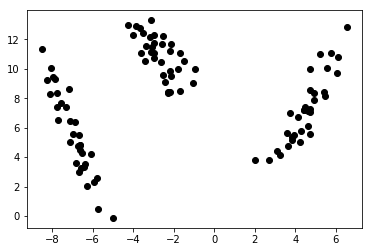

In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42, centers=3)
X[:,1] += 0.25*X[:,0]**2
# print(X.shape)
# print(y)
# plt.scatter(X[:, 0], X[:, 1], 20, y, edgecolor='none')
plt.plot(X[:, 0], X[:, 1], 'ok')


Labels: 
 [1 0 2 0 1 0 2 0 0 2 2 1 1 2 2 1 1 2 1 1 2 1 1 2 2 2 0 1 1 1 1 0 0 1 2 2 2
 2 0 0 1 2 0 2 2 0 2 1 1 0 0 0 2 1 1 1 2 2 0 2 1 0 1 0 1 1 0 1 0 0 0 1 1 2
 0 1 0 1 0 0 2 0 2 1 2 2 2 0 2 0 0 0 2 0 2 2 2 0 1 2]
Data: 
 [2 1 0 1 2 1 0 1 1 0 0 2 2 0 0 2 2 0 2 2 0 2 2 0 0 0 1 2 2 2 2 1 1 2 0 0 0
 0 1 1 2 0 1 0 0 1 2 2 2 1 1 1 0 2 2 2 0 0 1 0 2 1 2 1 2 2 1 2 1 1 1 2 2 0
 1 2 1 2 1 1 0 1 0 2 0 0 0 1 0 1 1 1 0 1 0 0 0 1 2 0]
[[  4.49951001   7.23789635]
 [ -6.90372834   5.38899312]
 [ -2.83406982  10.88809008]]


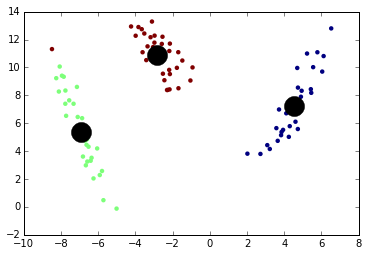

In [65]:
from sklearn.cluster import KMeans, AffinityPropagation, SpectralClustering

# cluster = AffinityPropagation()
cluster = KMeans(n_clusters=3)
# cluster = SpectralClustering(n_clusters=3)

# kmeans.fit(X)
# kmeans.labels_
# labels = cluster.predict(X)
labels = cluster.fit_predict(X)

print('Labels: \n', labels)
print('Data: \n', y)
print(cluster.cluster_centers_)
plt.scatter(X[:, 0], X[:, 1], 20, labels, edgecolor='none')
for n in range(3):
    plt.plot(cluster.cluster_centers_[n, 0], cluster.cluster_centers_[n, 1], 'ok', markersize=20)

# Digets examples

### Classification using (linear) PCA and (nonlinear) Isometric Maps

1797


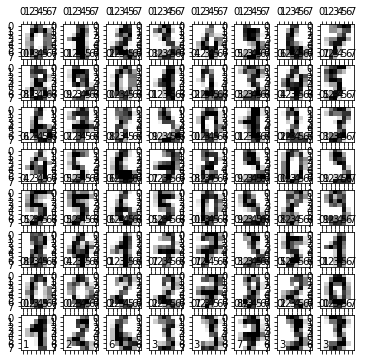

In [5]:
from sklearn.datasets import load_digits
digits = load_digits()
print(len(digits.images))
fig = plt.figure(figsize=(6, 6))

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.matshow(digits.images[i], cmap=plt.cm.binary)
    ax.text(0, 7, str(digits.target[i]))

In [6]:
digits.data.shape

(1797, 64)

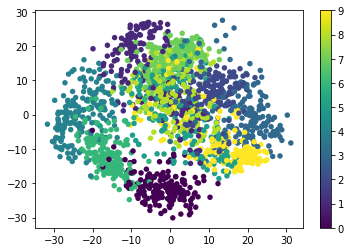

In [7]:
from sklearn.decomposition import RandomizedPCA, PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], 30, digits.target, edgecolor='none')
plt.colorbar()

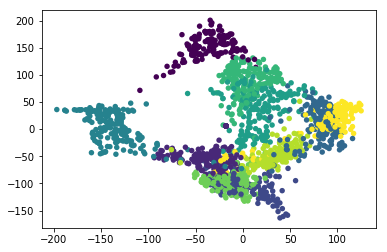

In [8]:
from sklearn.manifold import Isomap
iso = Isomap(n_neighbors=5, n_components=2)
proj = iso.fit_transform(digits.data)
plt.scatter(proj[:, 1], proj[:, 0], 30, digits.target, edgecolor='none')

### Unsuperised learning

Notice that the training labels are unused. The digits have been separated, but they have no meaning.

In [11]:
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit(digits.data)
# kmeans.cluster_centers_.shape

fig, axs = plt.subplots(2, 5, figsize=(8, 3))
axs = axs.flatten()
for n in range(10):
    axs[n].imshow(kmeans.cluster_centers_[n].reshape(8, 8), cmap=plt.cm.gray_r)

NameError: name 'KMeans' is not defined

### Supervised learning

Here, we will use the didgit labels to see how well we can reproduce the labels.

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

clf = GaussianNB()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
expected = y_test

In [13]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99        48
          1       0.83      0.83      0.83        41
          2       0.96      0.62      0.76        40
          3       0.95      0.86      0.90        43
          4       0.97      0.81      0.89        48
          5       0.96      0.89      0.93        56
          6       0.94      1.00      0.97        50
          7       0.70      1.00      0.83        43
          8       0.63      0.91      0.75        44
          9       0.92      0.65      0.76        37

avg / total       0.89      0.87      0.87       450



In [14]:
print(metrics.confusion_matrix(expected, predicted))

[[48  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  1  2  2  2]
 [ 0  4 25  0  0  0  0  0 11  0]
 [ 0  0  1 37  0  1  0  2  2  0]
 [ 1  0  0  0 39  1  1  6  0  0]
 [ 0  0  0  0  0 50  0  3  3  0]
 [ 0  0  0  0  0  0 50  0  0  0]
 [ 0  0  0  0  0  0  0 43  0  0]
 [ 0  3  0  0  0  0  0  1 40  0]
 [ 0  0  0  2  1  0  1  4  5 24]]
